In [1]:
# !pip install matplotlib
# !pip install pandas
# !pip install keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [2]:
# !pip install sklearn

In [3]:
# Importing the training set
df=pd.read_csv('data/input_data.csv')
df.head()

,Row Labels,Sum of inst_num,Sum of time,Sum of plan_cpu,Average of plan_cpu,Sum of plan_mem,Average of plan_mem
0,J1_11,2,139,100,50.000000,0.40,0.200000
1,J1_11_12,35,48,100,100.000000,0.59,0.590000
2,J1_13_16,5,4,100,100.000000,0.59,0.590000
3,J1_2,2,7,200,100.000000,1.18,0.590000
4,J1_2_3,5,2047,250,83.333333,1.48,0.493333


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Row Labels           5898 non-null   object 
 1   Sum of inst_num      5898 non-null   int64  
 2   Sum of time          5898 non-null   int64  
 3   Sum of plan_cpu      5898 non-null   int64  
 4   Average of plan_cpu  5898 non-null   float64
 5   Sum of plan_mem      5898 non-null   float64
 6   Average of plan_mem  5898 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 322.7+ KB


In [5]:
train = df[["Sum of time", "Average of plan_cpu", "Average of plan_mem"]]
training_set_size=len(train)
print(training_set_size)

5898


In [6]:
train[:10]

,Sum of time,Average of plan_cpu,Average of plan_mem
0,139,50.000000,0.200000
1,48,100.000000,0.590000
2,4,100.000000,0.590000
3,7,100.000000,0.590000
4,2047,83.333333,0.493333
5,29,100.000000,0.590000
6,19,100.000000,0.590000
7,635,55.555556,0.243333
8,83,92.857143,0.534286
9,407,50.000000,0.200000


In [7]:
# Getting the inputs and the ouputs
X1_train = train
y_train = df[["Sum of inst_num"]]
print(len(X1_train))
# Reshaping
X1_train = np.array(X1_train)
X2_train = X1_train.reshape(training_set_size, 3, 1) #3 dimesion
print(X2_train)

5898
[[[1.39000000e+02]
  [5.00000000e+01]
  [2.00000000e-01]]

 [[4.80000000e+01]
  [1.00000000e+02]
  [5.90000000e-01]]

 [[4.00000000e+00]
  [1.00000000e+02]
  [5.90000000e-01]]

 ...

 [[4.50000000e+01]
  [4.00000000e+02]
  [1.72000000e+00]]

 [[4.50000000e+01]
  [4.00000000e+02]
  [1.72000000e+00]]

 [[8.12790000e+06]
  [8.47299980e+01]
  [3.45715594e-01]]]


In [8]:
X1_train

array([[1.39000000e+02, 5.00000000e+01, 2.00000000e-01],
       [4.80000000e+01, 1.00000000e+02, 5.90000000e-01],
       [4.00000000e+00, 1.00000000e+02, 5.90000000e-01],
       ...,
       [4.50000000e+01, 4.00000000e+02, 1.72000000e+00],
       [4.50000000e+01, 4.00000000e+02, 1.72000000e+00],
       [8.12790000e+06, 8.47299980e+01, 3.45715594e-01]])

In [9]:
# X2_train = np.stack(X2_train, axis=0)  

In [10]:
 from keras import optimizers

In [11]:
# define model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(None, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
sgd = optimizers.SGD(lr= 1e-3 , decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])


In [12]:
from keras.callbacks import ModelCheckpoint
# specify filepath- this will write a new file for each epoch with the epoch number contained within the filename
filepath="weights/nn_weights-{epoch:02d}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, 
                                             save_weights_only=False, save_best_only=False, mode='max')

In [13]:
history=model.fit(X2_train, y_train, validation_split=0.3, batch_size = 3, epochs = 100, callbacks=[checkpoint], initial_epoch=0)

Epoch 1/100
1376/1376 [==============================] - 2s 1ms/step - loss: 1542062161.2966 - accuracy: 0.3994 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 2/100
1376/1376 [==============================] - 1s 802us/step - loss: 1840953286.1603 - accuracy: 0.3955 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 3/100
1376/1376 [==============================] - 1s 826us/step - loss: 2209287827.5872 - accuracy: 0.4057 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 4/100
1376/1376 [==============================] - 1s 833us/step - loss: 548897822.5492 - accuracy: 0.3965 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 5/100
1376/1376 [==============================] - 1s 820us/step - loss: 1051703402.5594 - accuracy: 0.3981 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 6/100
1376/1376 [==============================] - 1s 839us/step - loss: 7174928475.7627 - accuracy: 0.4064 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 7

1376/1376 [==============================] - 1s 818us/step - loss: 2733561246.5114 - accuracy: 0.3892 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 51/100
1376/1376 [==============================] - 1s 816us/step - loss: 5810444043.5068 - accuracy: 0.4058 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 52/100
1376/1376 [==============================] - 1s 825us/step - loss: 2757937244.4802 - accuracy: 0.4058 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 53/100
1376/1376 [==============================] - 1s 834us/step - loss: 13052557615.3658 - accuracy: 0.4102 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 54/100
1376/1376 [==============================] - 1s 853us/step - loss: 4178056011.0035 - accuracy: 0.4081 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 55/100
1376/1376 [==============================] - 1s 895us/step - loss: 3010349898.2942 - accuracy: 0.4022 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 56/1

1376/1376 [==============================] - 1s 865us/step - loss: 3563389045.4930 - accuracy: 0.4070 - val_loss: 57380454400.0000 - val_accuracy: 0.9870
Epoch 100/100
1376/1376 [==============================] - 1s 884us/step - loss: 3619519229.1000 - accuracy: 0.3976 - val_loss: 57380454400.0000 - val_accuracy: 0.9870


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


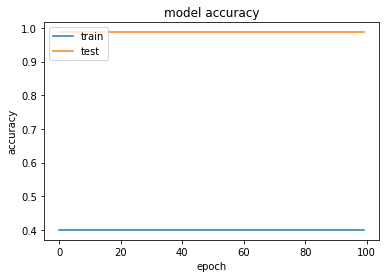

In [14]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


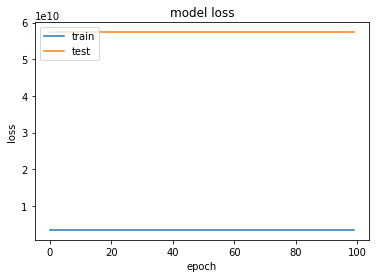

In [15]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
import time

time_start = time.process_time()

# Predicting the number of jobs for future
test_set = pd.read_csv('data/final_input_testing.csv')
#print(test_set[1])
real_value = test_set.iloc[:,1:2].values


# Getting the predicted jobs of previous values
inputs = real_value
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (103, 1, 1))
predicted_job = model.predict(inputs)
predicted_job = sc.inverse_transform(predicted_job)


FileNotFoundError: [Errno 2] File data/final_input_testing.csv does not exist: 'data/final_input_testing.csv'

In [ ]:
predicted_job

In [ ]:
fig=plt.figure(figsize=(12,8))
plt.title('Resource Allocation')
plt.xlabel('Time interval')
plt.ylabel('Number of instances')
plt.plot(test_set.time_interval,predicted_job,color='red', linestyle='dashed')
plt.scatter(df.time_interval,df.no_of_instances,color='blue')

plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_value, predicted_job))
print('rmse',rmse)

In [ ]:
for i in range(len(real_value)): 
    obs=real_value[i]
    yhat=predicted_job[i]
    APE=abs((yhat-obs)/obs)
    sumAPE=0
    sumAPE=sumAPE+APE
MAPE=(sumAPE/(len(real_value)))
print(MAPE)